In [16]:
# Import required libraries
import cv2
import glob
import imutils # A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges
import numpy as np
import easyocr # End-to-End Multi-Lingual Optical Character Recognition (OCR) Solution
import matplotlib.pyplot as plt

In [34]:
# Now read all the images
imdir = 'images/'
ext = ['png', 'jpg', 'jpeg']    # Add image formats here

files = []
# Adding all the extension files
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
files

['images/19947383131_7d4ae608e4_k.jpg',
 'images/Datsun-redi-GO-AMT-20.jpg',
 'images/Mahindra-e2oPlus-Green-Color-Number-Plate.jpg',
 'images/98d748609558e28b444430be70050362.jpg',
 'images/DSC_0363.jpg']

In [35]:
# Reading all the files
images = [cv2.imread(file) for file in files]

(1248, 2047)


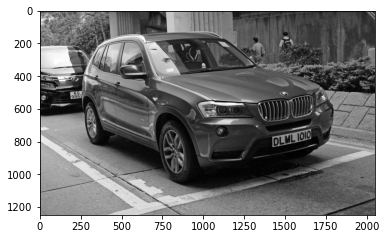

(460, 740)


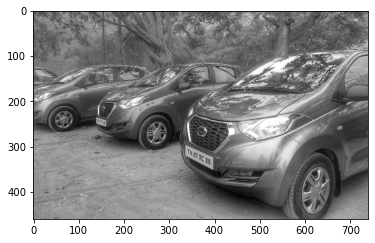

(600, 900)


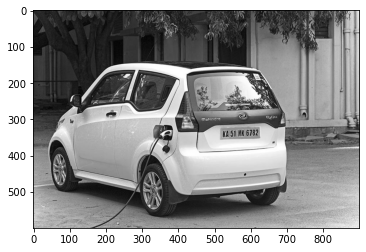

(846, 564)


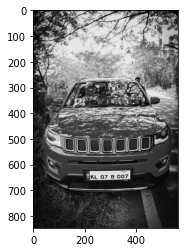

(578, 872)


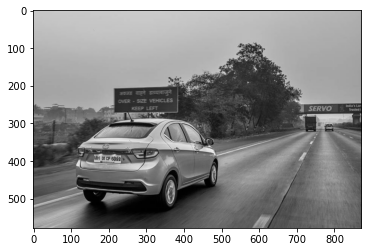

In [41]:
gray_images = []
# Loop is added so we can process all images in a folder
for img in images:
    try:
        # Converting original image to grayscale, cv2 reads in BGR initially and we are converting to Gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Matplotlib expects RGB format, so when displaying any image using it we have to use RGB
        plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
        gray_images.append(gray)
        plt.show() # Add this to print all the images in folder
    except Exception as e:
        print(e)
        print ("{} is not converted".format(img))

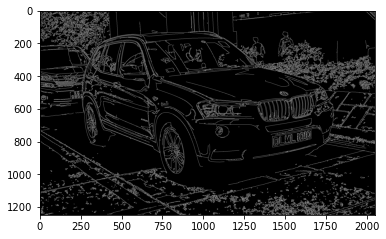

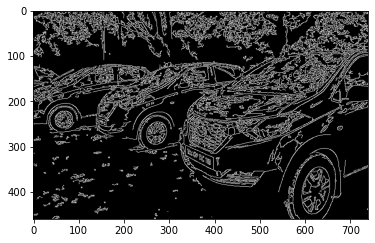

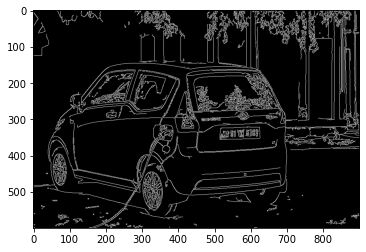

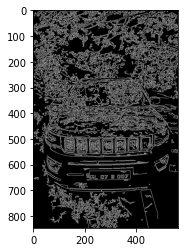

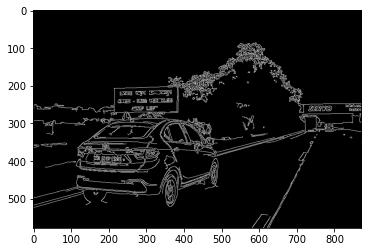

In [37]:
# A bilateral filter is used for smoothening images and reducing noise, while preserving edges.
# The Bilateral Filter operation applies a bilateral image to a filter
#     d: Diameter of each pixel neighborhood.
# sigmaColor: Value of \sigma in the color space. The greater the value, the colors farther to each other will start to get mixed.
# sigmaColor: Value of \sigma in the coordinate space. The greater its value, the more further pixels will mix together, given that their colors lie within the sigmaColor range.

# Apply bilateral filter with d = 15, 
# sigmaColor = sigmaSpace = 75.

edged_images = []
for img in gray_images:
    try:
        bilateral_img = cv2.bilateralFilter(img, 11, 17, 17) # Noise Reduction
        edged_img = cv2.Canny(bilateral_img, 30, 200) # Edge detection
        plt.imshow(cv2.cvtColor(edged_img, cv2.COLOR_BGR2RGB))
        edged_images.append(edged_img)
        plt.show()
    except Exception as e:
        print(e)
        print ("{} is not converted".format(img))

In [38]:
# Next step is contour detection
# By using contour detection, we can detect the borders of objects, and therefore, localize them easily
# We are finding a rectangle
imgs_contours = []
for img in edged_images:
    try:
        keypoints = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        # Params: Edged_image, image to be returned as(here we want tree), what type of results(approximate contours)

        # Grabs the appropriate tuple value
        contours = imutils.grab_contours(keypoints)
        # Return top 10 contours
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
        imgs_contours.append(contours)
    except Exception as e:
        print(e)
        print ("{} is not converted".format(img))

In [43]:
# Now iterate in these imgs_contours to check if we have got a number plate or some square
numberplate_locations = []
for contour in imgs_contours:
    for c in contour:
        approx = cv2.approxPolyDP(c, 10, True) # second param number should ideally high to get more rough estimation
        # If a rectange is found(polygon with 4 sides)
        if len(approx) == 4:
            location = approx
            numberplate_locations.append(location)
            break

# Approx coordinates of our number plate in images
numberplate_locations

[array([[[1656,  725]],
 
        [[1420,  771]],
 
        [[1420,  834]],
 
        [[1655,  784]]], dtype=int32), array([[[284, 247]],
 
        [[253, 260]],
 
        [[262, 294]],
 
        [[293, 278]]], dtype=int32), array([[[623, 322]],
 
        [[518, 324]],
 
        [[514, 355]],
 
        [[623, 353]]], dtype=int32), array([[[378, 623]],
 
        [[374, 657]],
 
        [[221, 658]],
 
        [[221, 624]]], dtype=int32), array([[[115, 454]],
 
        [[278, 454]],
 
        [[301, 476]],
 
        [[130, 470]]], dtype=int32)]

0


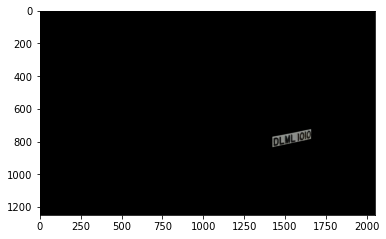

1


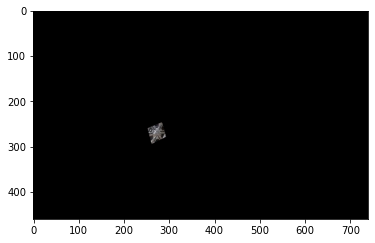

2


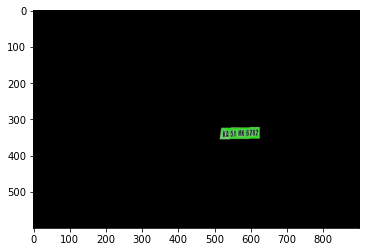

3


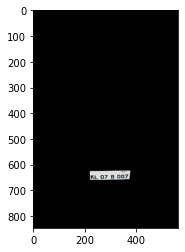

4


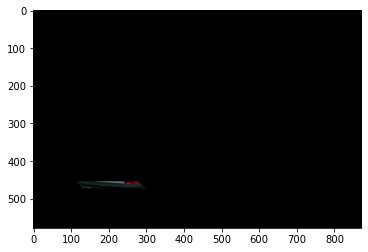

In [52]:
# Now we will do masking
for idx, img in enumerate(images):
    try:
        mask = np.zeros(gray_images[idx].shape, np.uint8)
        new_image = cv2.drawContours(mask, [numberplate_locations[idx]], 0, 255, -1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        new_image = cv2.bitwise_and(img, img, mask=mask)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.show()
    except Exception as e:
        print(e)
        print ("{} is not converted".format(img))